In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

from skimage.util import random_noise

In [2]:
## data 불러오기

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root = '../data', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [4]:
## 원본 데이터 확인

In [5]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

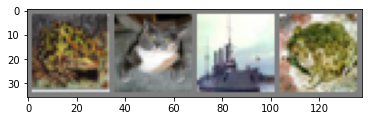

 frog   cat  ship  frog


In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
## negative

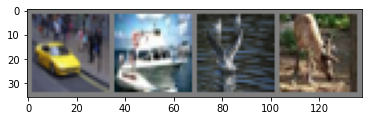

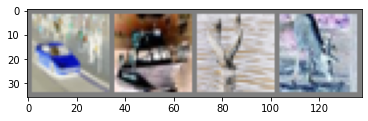

  car  ship  bird  deer


In [8]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

negative_images = 0 - images

imshow(torchvision.utils.make_grid(images))
imshow(torchvision.utils.make_grid(negative_images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
## Gaussian noise

In [10]:
gaussian_mean = 0
gaussian_var = 0.1

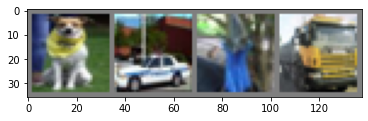

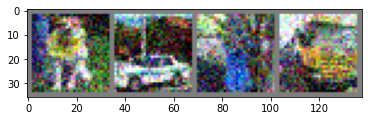

  dog   car  bird truck


In [11]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

gaussian_noise_images = torch.tensor(random_noise(images, mode = 'gaussian', mean = gaussian_mean, var = gaussian_var, clip = True))

imshow(torchvision.utils.make_grid(images))
imshow(torchvision.utils.make_grid(gaussian_noise_images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
## Gaussian blur

In [13]:
Gaussian_sigma = 1
Gaussian_transform = transforms.Compose([transforms.GaussianBlur(kernel_size = 5, sigma = Gaussian_sigma)])

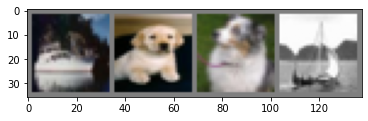

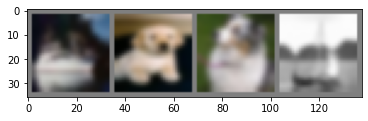

 ship   dog   dog  ship


In [14]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

gaussian_blur_images = Gaussian_transform(images)

imshow(torchvision.utils.make_grid(images))
imshow(torchvision.utils.make_grid(gaussian_blur_images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [15]:
## Salt and Pepper

In [16]:
salt_and_pepper_val = 0.5
salt_and_pepper_amount = 0.1

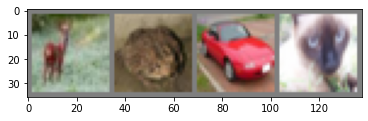

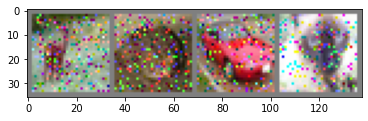

 deer  frog   car   cat


In [17]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

salt_and_pepper_images = torch.tensor(random_noise(images, mode = 's&p', amount = salt_and_pepper_amount, salt_vs_pepper = salt_and_pepper_val, clip = True))

imshow(torchvision.utils.make_grid(images))
imshow(torchvision.utils.make_grid(salt_and_pepper_images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))